# Random Forest Model

AUC (in-sample): 0.822


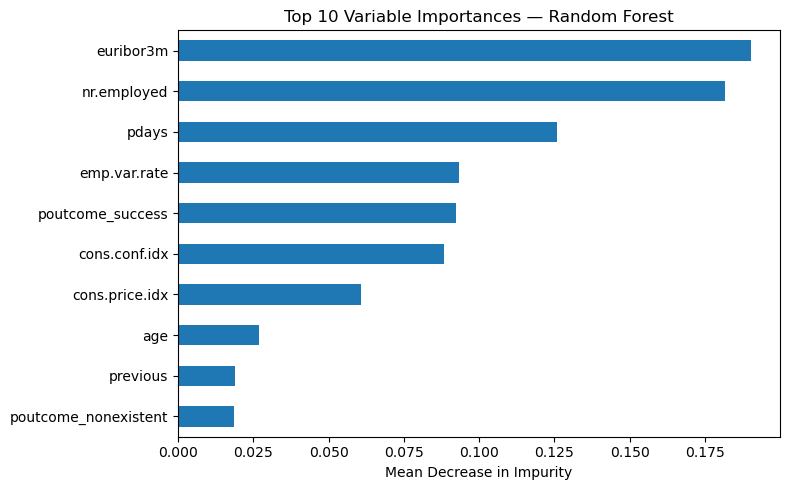

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Load and prepare
df = pd.read_csv("bank-additional-full.csv", sep=";")
df["y"] = (df["y"] == "yes").astype(int)
X = pd.get_dummies(df.drop(columns=["y", "duration"]), drop_first=True)
y = df["y"]

# Train forest
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None,
    min_samples_leaf=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)

# Evaluate
y_pred = rf.predict_proba(X)[:,1]
auc = roc_auc_score(y, y_pred)
print(f"AUC (in-sample): {auc:.3f}")

# Variable importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
top = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top[::-1].plot(kind="barh")
plt.title("Top 10 Variable Importances — Random Forest")
plt.xlabel("Mean Decrease in Impurity")
plt.tight_layout()
plt.show()